In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
from matplotlib import rcParams
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['savefig.dpi'] = 300

In [3]:
k2_planets = pd.read_csv('k2candidates_2021.03.27_23.08.30.csv')

In [4]:
k2_planets.head(5)

,loc_rowid,epic_name,epic_candname,pl_name,k2c_refdisp,k2c_reflink,k2c_disp,k2c_note,k2_campaign,k2c_recentflag,...,st_rad,st_raderr1,st_raderr2,st_radlim,st_kep,st_keperr,st_keplim,st_k2,st_k2err,st_k2lim
0,1,EPIC 201092629,EPIC 201092629.01,K2-241 b,CONFIRMED,<a refstr=LIVINGSTON_ET_AL__2018 href=https://...,CONFIRMED,NaN,10.0,1,...,NaN,NaN,NaN,NaN,11.858,NaN,0.0,9.933,0.023,0.0
1,2,EPIC 201102594,EPIC 201102594.01,K2-242 b,CONFIRMED,<a refstr=LIVINGSTON_ET_AL__2018 href=https://...,CONFIRMED,NaN,10.0,1,...,NaN,NaN,NaN,NaN,15.615,NaN,0.0,11.777,0.024,0.0
2,3,EPIC 201110617,EPIC 201110617.01,K2-156 b,CONFIRMED,<a refstr=MAYO_ET_AL__2018 href=https://ui.ads...,CONFIRMED,NaN,10.0,0,...,0.62,0.02,-0.02,0.0,12.947,NaN,0.0,10.391,0.023,0.0
3,4,EPIC 201110617,EPIC 201110617.01,K2-156 b,CONFIRMED,<a refstr=LIVINGSTON_ET_AL__2018 href=https://...,CONFIRMED,NaN,10.0,1,...,NaN,NaN,NaN,NaN,12.947,NaN,0.0,10.391,0.023,0.0
4,5,EPIC 201111557,EPIC 201111557.01,NaN,CANDIDATE,<a refstr=MAYO_ET_AL__2018 href=https://ui.ads...,CANDIDATE,NaN,10.0,0,...,0.71,0.02,-0.02,0.0,11.363,NaN,0.0,9.220,0.019,0.0


In [5]:
k2_confirmed = k2_planets.copy()
k2_confirmed = k2_confirmed[k2_confirmed.k2c_refdisp.str.contains('CONFIRMED')]
k2_candidate = k2_planets.copy()
k2_candidate = k2_candidate[k2_candidate.k2c_refdisp.str.contains('CANDIDATE')]

In [53]:
k2_copy = k2_planets.copy()
k2_orbper = k2_copy.filter(['pl_name','pl_orbper'], axis=1)
k2_orbper = k2_orbper.sort_values(by=['pl_orbper'], ascending=False)
k2_orbper.head()

,pl_name,pl_orbper
519,NaN,83830.0
300,NaN,6340.0
349,NaN,2790.0
470,NaN,540.0
254,NaN,440.0


In [54]:
k2_rad = k2_copy.filter(['pl_name','pl_rade'], axis=1)
k2_rad = k2_rad.sort_values(by=['pl_rade'], ascending=False)
k2_rad.head()

,pl_name,pl_rade
446,NaN,1080.000
2266,NaN,591.100
435,NaN,452.000
2162,NaN,370.000
2491,NaN,316.734


In [45]:
print(k2_planets.shape)
print(k2_confirmed.shape)
print(k2_candidate.shape)

(2582, 40)
(371, 40)
(1974, 40)


In [6]:
k2_confirmed.columns

Index(['loc_rowid', 'epic_name', 'epic_candname', 'pl_name', 'k2c_refdisp',
       'k2c_reflink', 'k2c_disp', 'k2c_note', 'k2_campaign', 'k2c_recentflag',
       'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim',
       'pl_tranmid', 'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_tranmidlim',
       'pl_ratdor', 'pl_ratdorerr1', 'pl_ratdorerr2', 'pl_ratdorlim',
       'pl_ratror', 'pl_ratrorerr1', 'pl_ratrorerr2', 'pl_ratrorlim',
       'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'st_rad',
       'st_raderr1', 'st_raderr2', 'st_radlim', 'st_kep', 'st_keperr',
       'st_keplim', 'st_k2', 'st_k2err', 'st_k2lim'],
      dtype='object')

In [7]:
k2_candidate.iloc[0]

loc_rowid                                                         5
epic_name                                            EPIC 201111557
epic_candname                                     EPIC 201111557.01
pl_name                                                         NaN
k2c_refdisp                                               CANDIDATE
k2c_reflink       <a refstr=MAYO_ET_AL__2018 href=https://ui.ads...
k2c_disp                                                  CANDIDATE
k2c_note                                                        NaN
k2_campaign                                                    10.0
k2c_recentflag                                                    0
pl_orbper                                                  2.302368
pl_orbpererr1                                              0.000105
pl_orbpererr2                                             -0.000103
pl_orbperlim                                                    0.0
pl_tranmid                                      

In [8]:
k2_confirmed.iloc[0]

loc_rowid                                                         1
epic_name                                            EPIC 201092629
epic_candname                                     EPIC 201092629.01
pl_name                                                    K2-241 b
k2c_refdisp                                               CONFIRMED
k2c_reflink       <a refstr=LIVINGSTON_ET_AL__2018 href=https://...
k2c_disp                                                  CONFIRMED
k2c_note                                                        NaN
k2_campaign                                                    10.0
k2c_recentflag                                                    1
pl_orbper                                                   26.8199
pl_orbpererr1                                               0.00245
pl_orbpererr2                                              -0.00247
pl_orbperlim                                                    0.0
pl_tranmid                                      

In [9]:
confirmed_orbper = k2_confirmed.filter(['pl_name','pl_orbper'], axis=1)
confirmed_orbper = confirmed_orbper.astype({'pl_name': str, 'pl_orbper': np.float})
confirmed_orbper_mean = confirmed_orbper['pl_orbper'].mean()

In [10]:
confirmed_orbper = confirmed_orbper.sort_values(by=['pl_orbper'])
confirmed_orbper = confirmed_orbper.reset_index()

In [11]:
confirmed_orbper = confirmed_orbper[confirmed_orbper['pl_orbper'] <= 365]
print(f'{confirmed_orbper.shape[0]} exoplanets with orbital periods less than or equal to 1 year long.')
print(f'{k2_confirmed.shape[0] - confirmed_orbper.shape[0]} exoplanets with orbital periods more than 1 year long.')
print(confirmed_orbper['pl_orbper'].mean())

371 exoplanets with orbital periods less than or equal to 1 year long.
0 exoplanets with orbital periods more than 1 year long.
10.879980055525607


In [12]:
candidate_orbper = k2_candidate.filter(['pl_name','pl_orbper'], axis=1)
candidate_orbper = candidate_orbper.astype({'pl_name': str, 'pl_orbper': np.float})
candidate_orbper = candidate_orbper.sort_values(by=['pl_orbper'])
candidate_orbper = candidate_orbper.reset_index()
candidate_orbper_mean = candidate_orbper['pl_orbper'].mean()
candidate_orbper = candidate_orbper[candidate_orbper['pl_orbper'] <= 365]
print(f'{candidate_orbper.shape[0]} exoplanets with orbital periods less than or equal to 1 year long.')
print(f'{k2_candidate.shape[0] - candidate_orbper.shape[0]} exoplanets with orbital periods more than 1 year long.')

1948 exoplanets with orbital periods less than or equal to 1 year long.
26 exoplanets with orbital periods more than 1 year long.


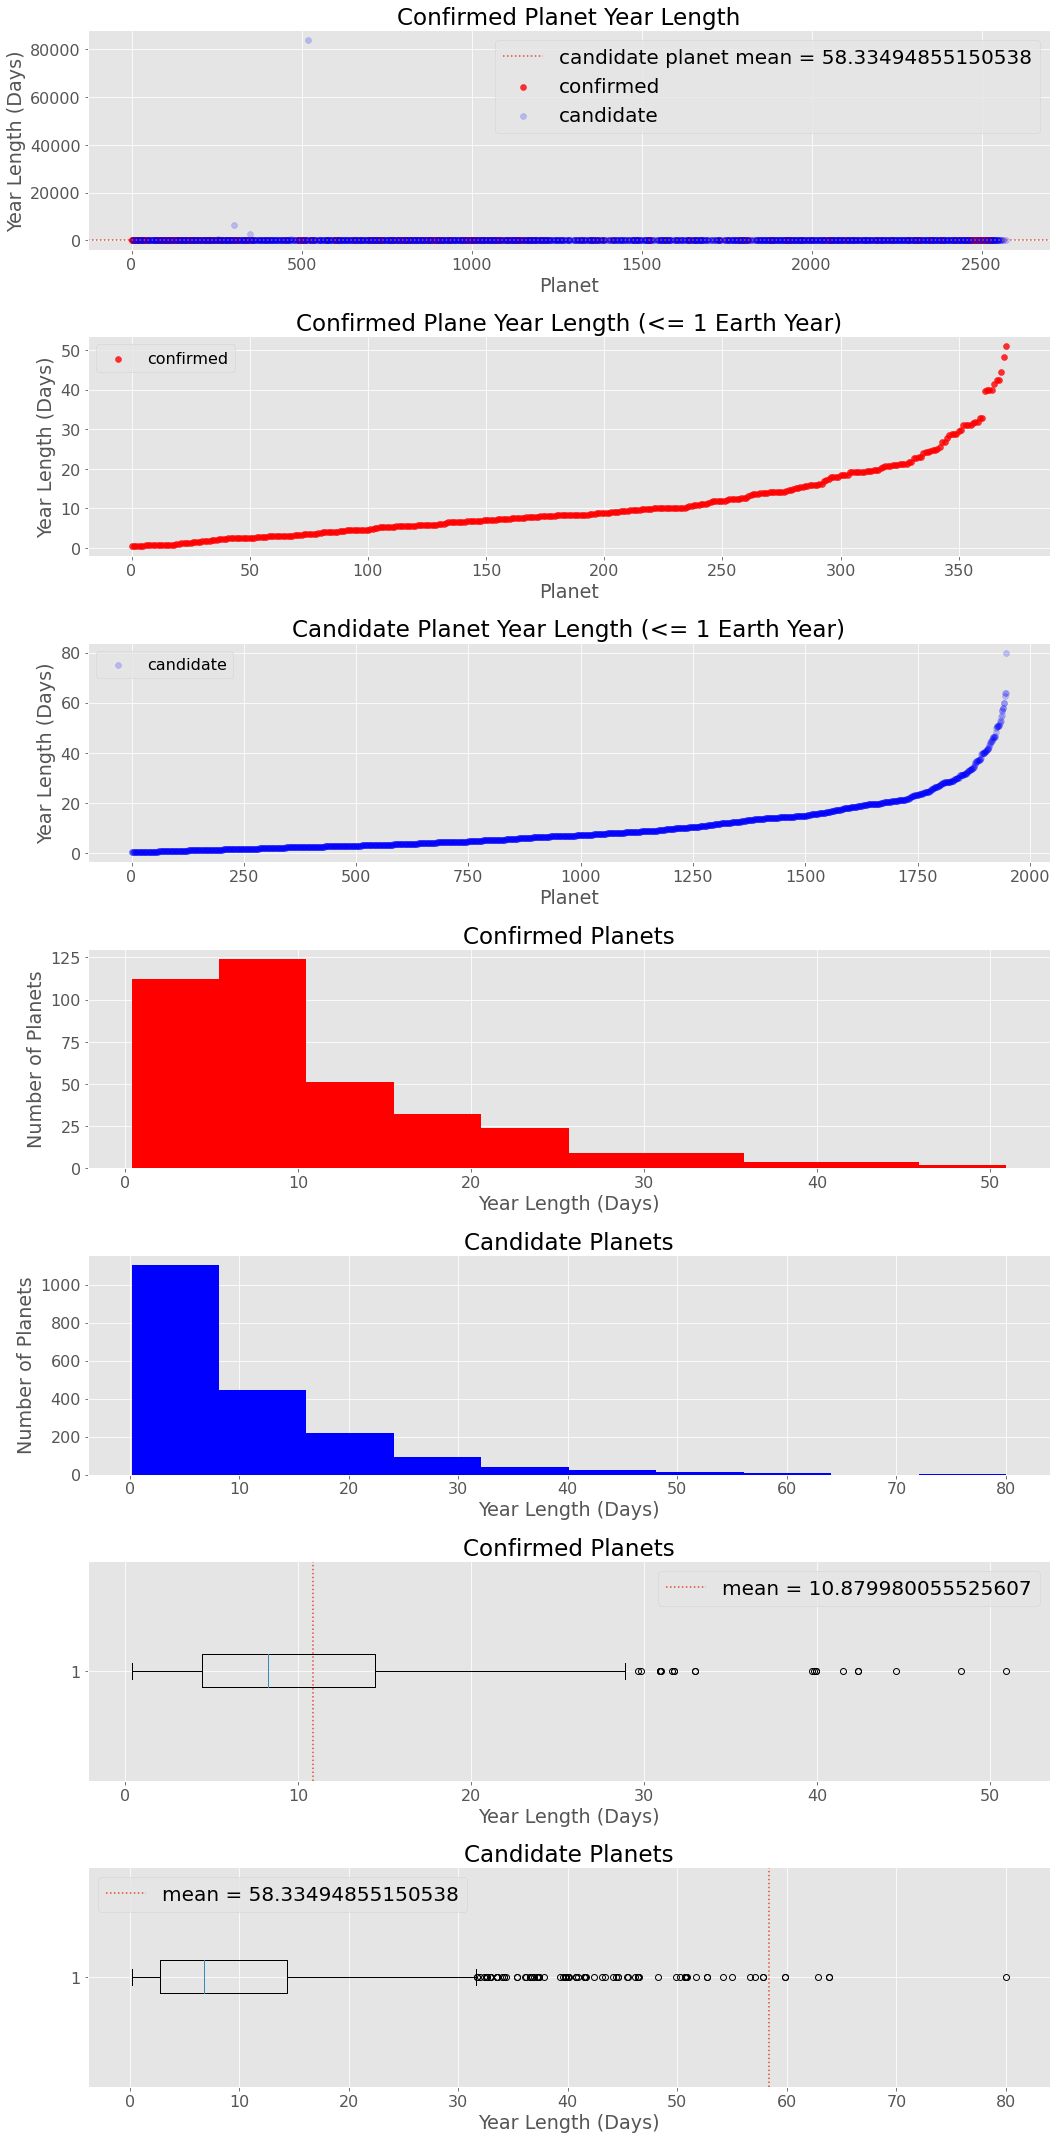

In [13]:
fig, ax = plt.subplots(7, figsize=(15, 30))

ax[0].scatter(x=k2_confirmed.index, y=k2_confirmed.loc[:, 'pl_orbper'], color='r', marker ='o', alpha=0.8, label='confirmed')
ax[0].scatter(x=k2_candidate.index, y=k2_candidate.loc[:, 'pl_orbper'], color='b', marker ='o', alpha=0.2, label='candidate')
ax[0].axhline(y=candidate_orbper_mean, label=f'candidate planet mean = {candidate_orbper_mean}', linestyle=':')
ax[0].set_title("Confirmed Planet Year Length")
ax[0].set_ylabel('Year Length (Days)')
ax[0].set_xlabel('Planet')
ax[0].legend(fontsize=20)
ax[1].scatter(x=confirmed_orbper.index, y=confirmed_orbper.loc[:,'pl_orbper'], color='r', marker ='o', alpha=0.8, label='confirmed')
ax[1].set_title("Confirmed Plane Year Length (<= 1 Earth Year)")
ax[1].set_ylabel('Year Length (Days)')
ax[1].set_xlabel('Planet')
ax[1].legend()
ax[2].scatter(x=candidate_orbper.index, y=candidate_orbper.loc[:,'pl_orbper'], color='b', marker ='o', alpha=0.2, label='candidate')
ax[2].set_title("Candidate Planet Year Length (<= 1 Earth Year)")
ax[2].set_ylabel('Year Length (Days)')
ax[2].set_xlabel('Planet')
ax[2].legend()
ax[3].hist(x=confirmed_orbper.loc[:, 'pl_orbper'], bins=10, color='r')
ax[3].set_title('Confirmed Planets')
ax[3].set_xlabel('Year Length (Days)')
ax[3].set_ylabel('Number of Planets')
ax[4].hist(x=candidate_orbper.loc[:, 'pl_orbper'], bins=10, color='b')
ax[4].set_title('Candidate Planets')
ax[4].set_xlabel('Year Length (Days)')
ax[4].set_ylabel('Number of Planets')
ax[5].boxplot(confirmed_orbper.loc[:, 'pl_orbper'], vert=False)
ax[5].axvline(x=confirmed_orbper_mean, label=f'mean = {confirmed_orbper_mean}', linestyle=':')
ax[5].legend(fontsize=20)
ax[5].set_title('Confirmed Planets')
ax[5].set_xlabel('Year Length (Days)')
ax[6].boxplot(candidate_orbper.loc[:, 'pl_orbper'], vert=False)
ax[6].axvline(x=candidate_orbper_mean, label=f'mean = {candidate_orbper_mean}', linestyle=':')
ax[6].legend(fontsize=20)
ax[6].set_title('Candidate Planets')
ax[6].set_xlabel('Year Length (Days)')

plt.tight_layout()
plt.show()

In [14]:
confirmed_radius = k2_confirmed.filter(['pl_name','pl_rade'], axis=1)
confirmed_radius = confirmed_radius.astype({'pl_name': str, 'pl_rade': np.float16})
confirmed_radius = confirmed_radius.sort_values(by=['pl_rade'])
confirmed_radius = confirmed_radius.reset_index()
confirmed_radius_mean = confirmed_radius['pl_rade'].mean(skipna=True)
jupiter_radius = 11.2
confirmed_radius = confirmed_radius[confirmed_radius['pl_rade'] <= jupiter_radius]

In [15]:
print(f'{confirmed_radius.shape[0]} exoplanets smaller than or equal to Jupiter.')
print(f'{k2_confirmed.shape[0] - confirmed_radius.shape[0]} exoplanets larger than Jupiter.')

353 exoplanets smaller than or equal to Jupiter.
18 exoplanets larger than Jupiter.


In [16]:
candidate_radius = k2_candidate.filter(['pl_name','pl_rade'], axis=1)
candidate_radius = candidate_radius.astype({'pl_name': str, 'pl_rade': np.float16})
candidate_radius = candidate_radius.sort_values(by=['pl_rade'])
candidate_radius = candidate_radius.reset_index()
candidate_radius_mean = candidate_radius['pl_rade'].mean(skipna=True)
jupiter_radius = 11.2
candidate_radius = candidate_radius[candidate_radius['pl_rade'] <= jupiter_radius]

In [17]:
print(f'{candidate_radius.shape[0]} exoplanets smaller than or equal to Jupiter.')
print(f'{k2_candidate.shape[0] - candidate_radius.shape[0]} exoplanets larger than Jupiter.')

1198 exoplanets smaller than or equal to Jupiter.
776 exoplanets larger than Jupiter.


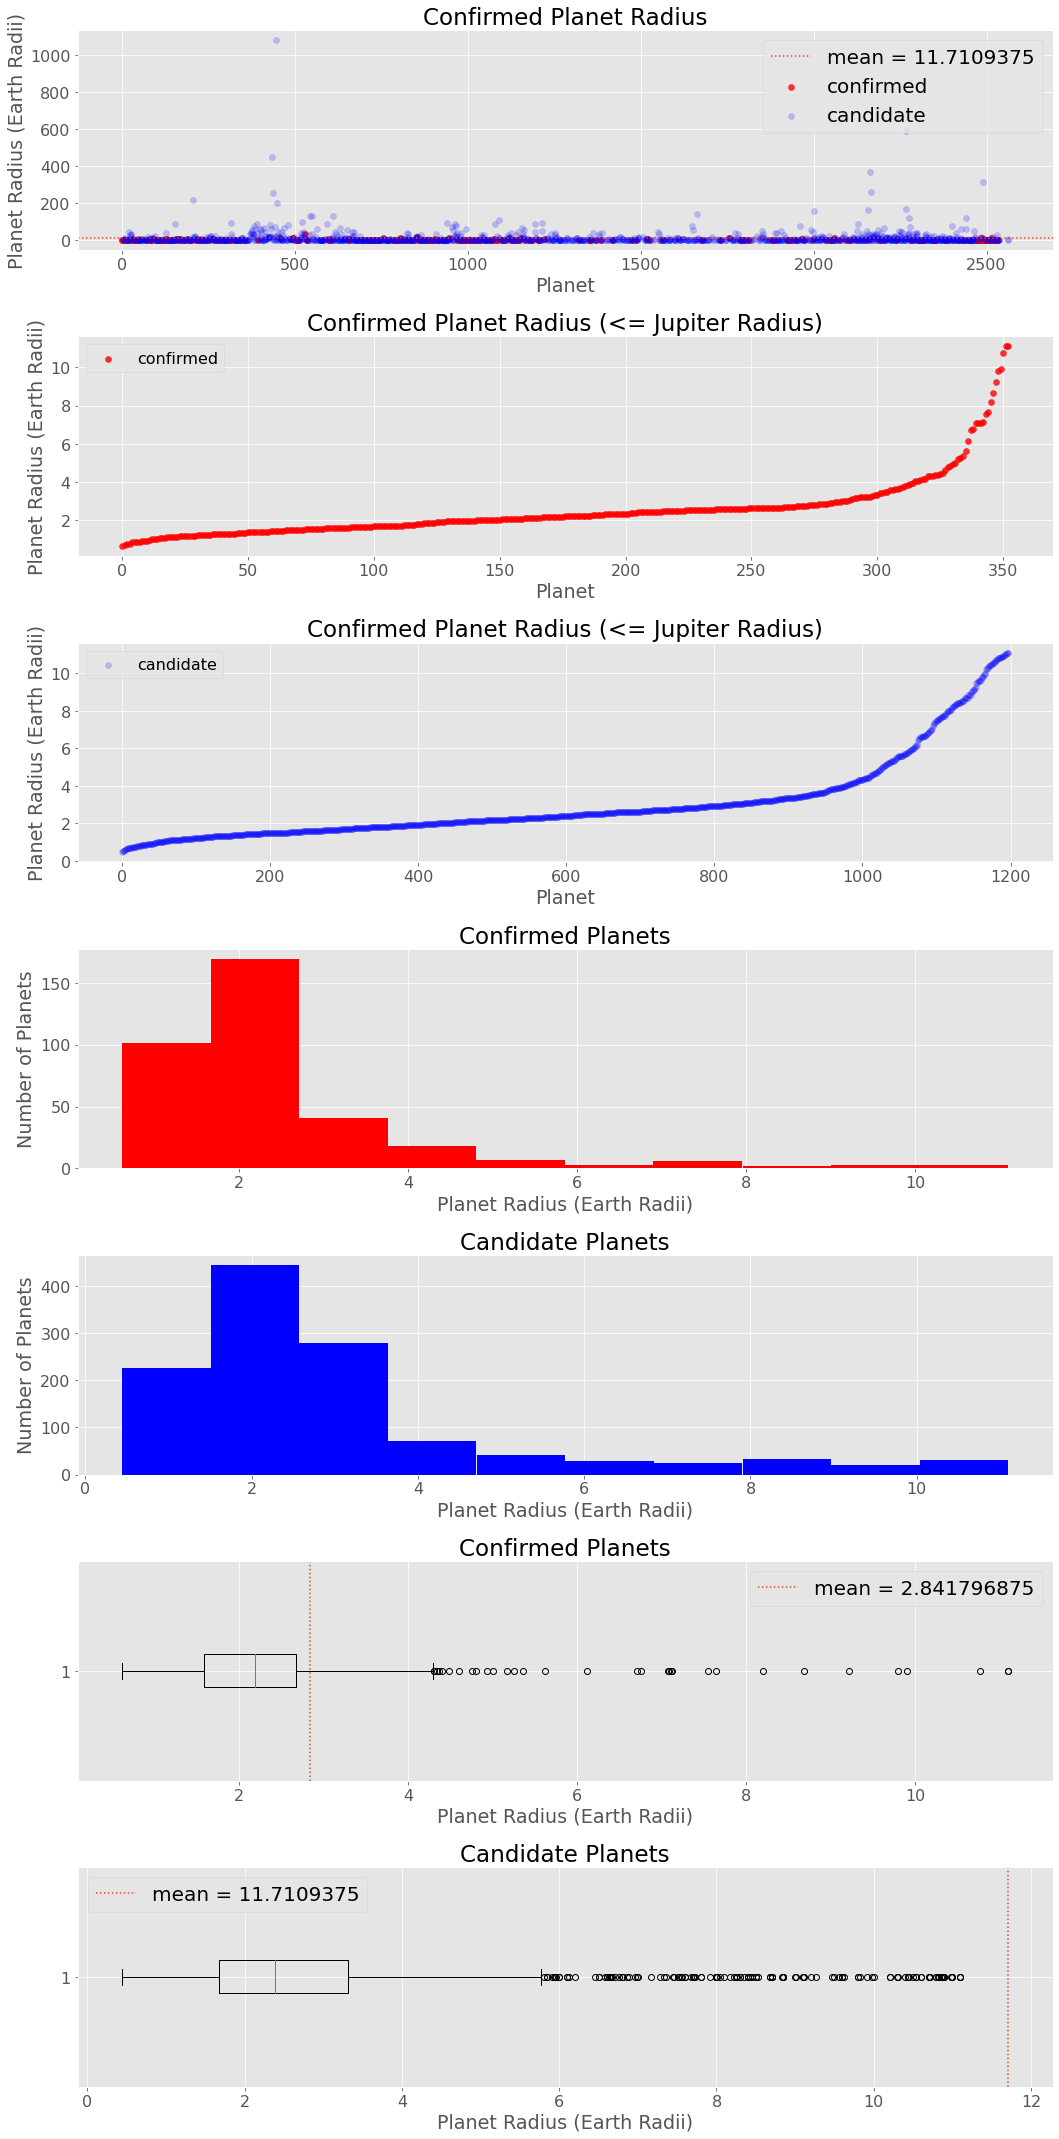

In [18]:
fig, ax = plt.subplots(7, figsize = (15, 30))

ax[0].scatter(x=k2_confirmed.index, y=k2_confirmed.loc[:, 'pl_rade'], color='r', marker ='o', alpha=0.8, label='confirmed')
ax[0].scatter(x=k2_candidate.index, y=k2_candidate.loc[:, 'pl_rade'], color='b', marker ='o', alpha=0.2, label='candidate')
ax[0].axhline(y=candidate_radius_mean, label=f'mean = {candidate_radius_mean}', linestyle=':')
ax[0].set_title("Confirmed Planet Radius")
ax[0].set_ylabel('Planet Radius (Earth Radii)')
ax[0].set_xlabel('Planet')
ax[0].legend(loc='upper right', fontsize=20)
ax[1].scatter(x=confirmed_radius.index, y=confirmed_radius.loc[:,'pl_rade'], color='r', marker ='o', alpha=0.8, label='confirmed')
ax[1].set_title("Confirmed Planet Radius (<= Jupiter Radius)")
ax[1].set_ylabel('Planet Radius (Earth Radii)')
ax[1].set_xlabel('Planet')
ax[1].legend()
ax[2].scatter(x=candidate_radius.index, y=candidate_radius.loc[:,'pl_rade'], color='b', marker ='o', alpha=0.2, label='candidate')
ax[2].set_title("Confirmed Planet Radius (<= Jupiter Radius)")
ax[2].set_ylabel('Planet Radius (Earth Radii)')
ax[2].set_xlabel('Planet')
ax[2].legend()
ax[3].hist(x=confirmed_radius.loc[:, 'pl_rade'], bins=10, color='r')
ax[3].set_title('Confirmed Planets')
ax[3].set_xlabel('Planet Radius (Earth Radii)')
ax[3].set_ylabel('Number of Planets')
ax[4].hist(x=candidate_radius.loc[:, 'pl_rade'], bins=10, color='b')
ax[4].set_title('Candidate Planets')
ax[4].set_xlabel('Planet Radius (Earth Radii)')
ax[4].set_ylabel('Number of Planets')
ax[5].boxplot(confirmed_radius.loc[:, 'pl_rade'], vert=False)
ax[5].axvline(x=confirmed_radius_mean, label=f'mean = {confirmed_radius_mean}', linestyle=':')
ax[5].legend(fontsize=20)
ax[5].set_label
ax[5].set_title('Confirmed Planets')
ax[5].set_xlabel('Planet Radius (Earth Radii)')
ax[6].boxplot(candidate_radius.loc[:, 'pl_rade'], vert=False)
ax[6].axvline(x=candidate_radius_mean, label=f'mean = {candidate_radius_mean}', linestyle=':')
ax[6].legend(fontsize=20)
ax[6].set_label
ax[6].set_title('Candidate Planets')
ax[6].set_xlabel('Planet Radius (Earth Radii)')

plt.tight_layout()
plt.show()

In [19]:
confirmed_yr_rad = k2_confirmed.filter(['pl_name','pl_orbper', 'pl_rade'], axis=1)
confirmed_yr_rad = confirmed_yr_rad.astype({'pl_name': str, 'pl_orbper': np.float16, 'pl_rade': np.float16})

In [20]:
confirmed_filtered_yr_rad = confirmed_yr_rad[confirmed_yr_rad['pl_orbper'] <= 365]
confirmed_filtered_yr_rad = confirmed_filtered_yr_rad[confirmed_filtered_yr_rad['pl_rade'] <= jupiter_radius]

In [21]:
candidate_yr_rad = k2_candidate.filter(['pl_name','pl_orbper', 'pl_rade'], axis=1)
candidate_yr_rad = candidate_yr_rad.astype({'pl_name': str, 'pl_orbper':np.float16, 'pl_rade': np.float16})

In [22]:
candidate_filtered_yr_rad = candidate_yr_rad[candidate_yr_rad['pl_orbper'] <= 365]
candidate_filtered_yr_rad = candidate_filtered_yr_rad[candidate_filtered_yr_rad['pl_rade'] <= jupiter_radius]

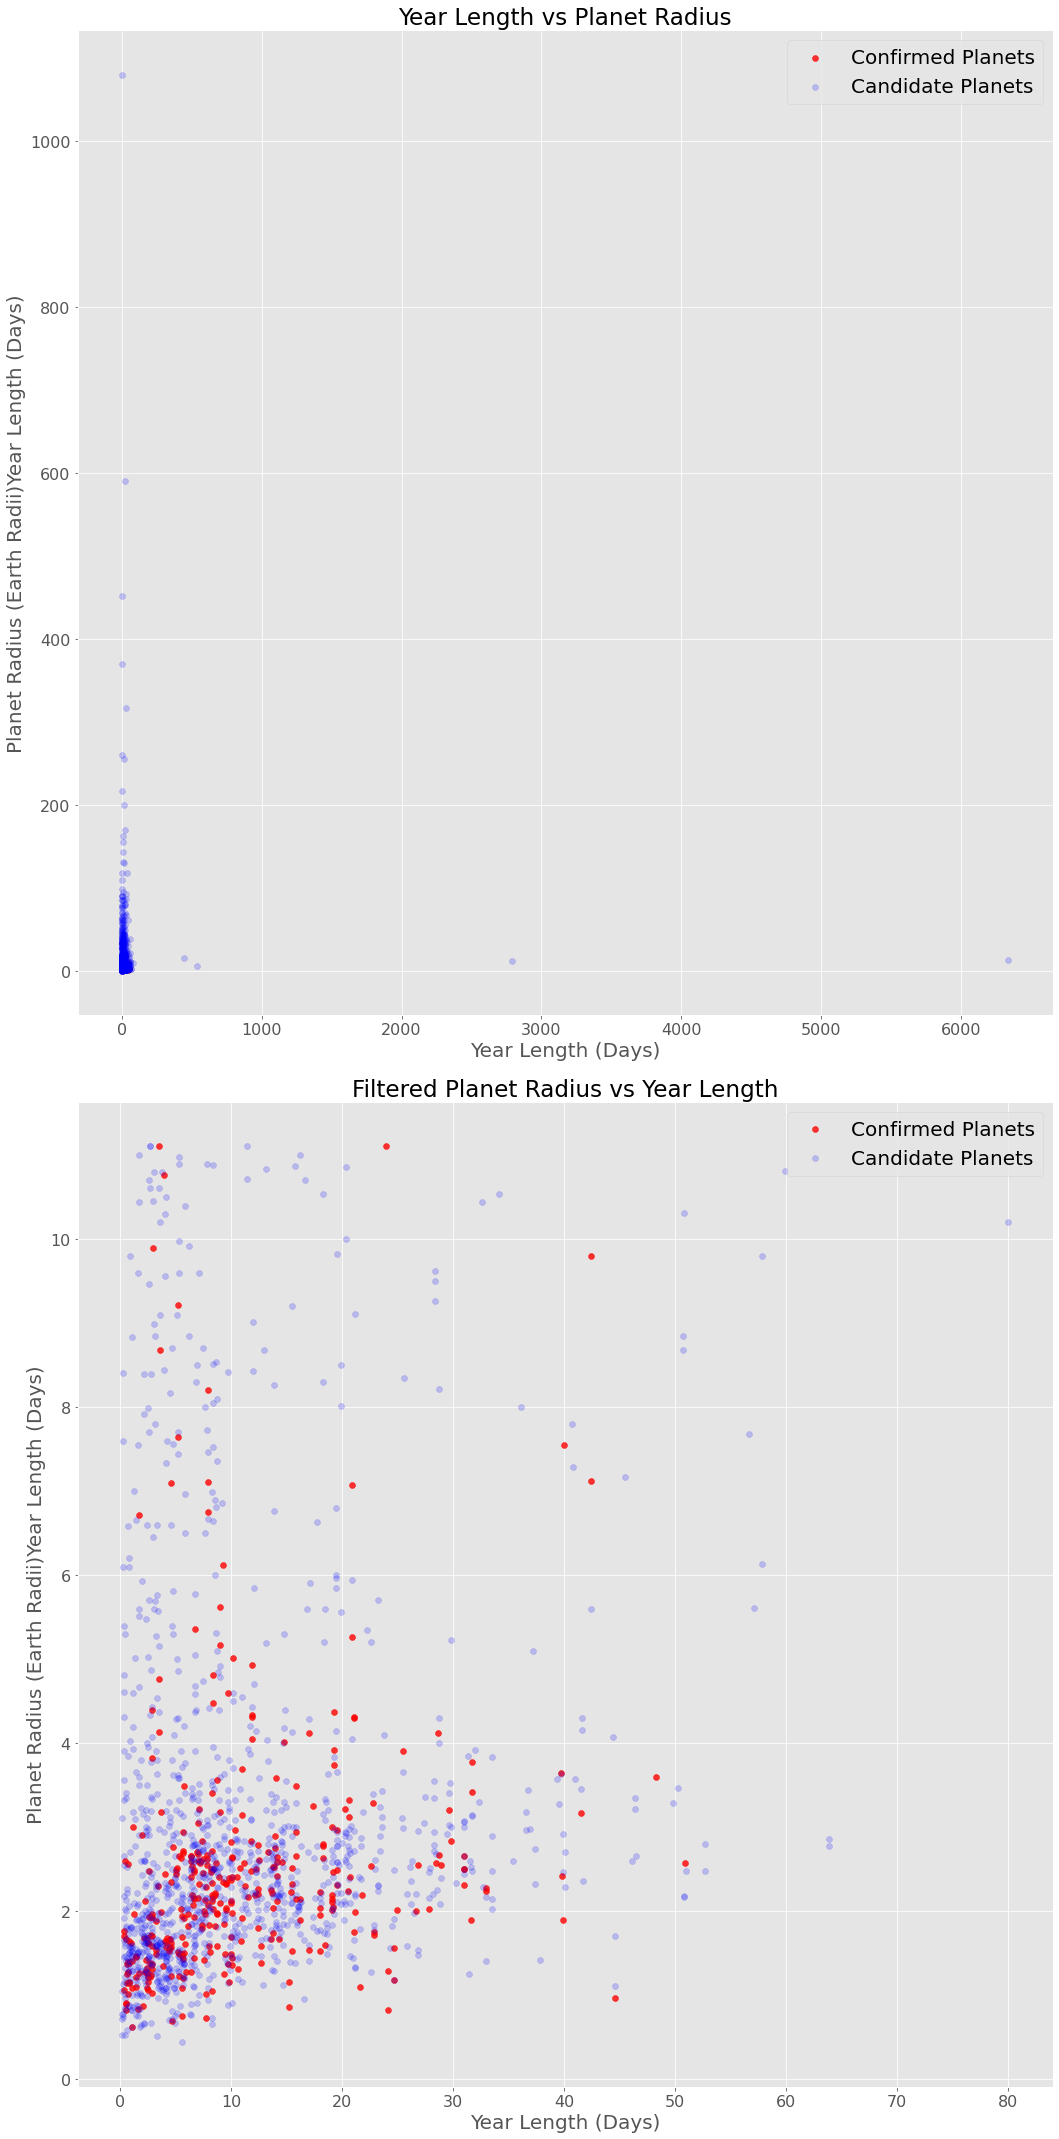

In [23]:
fig, ax = plt.subplots(2, figsize = (15, 30))

ax[0].scatter(x=confirmed_yr_rad.loc[:, 'pl_orbper'], y=confirmed_yr_rad.loc[:, 'pl_rade'], color='r', marker='o', alpha=0.8, label='Confirmed Planets')
ax[0].scatter(x=candidate_yr_rad.loc[:, 'pl_orbper'], y=candidate_yr_rad.loc[:, 'pl_rade'], color='b', marker='o', alpha=0.2, label='Candidate Planets')
ax[0].set_title('Year Length vs Planet Radius')
#ax[0].set_xlim(right=500)
#ax[0].set_ylim(top=200)
ax[0].set_xlabel('Year Length (Days)', fontsize=20)
ax[0].set_ylabel('Planet Radius (Earth Radii)Year Length (Days)', fontsize=20)
ax[0].legend(fontsize=20)
ax[1].scatter(x=confirmed_filtered_yr_rad.loc[:, 'pl_orbper'], y=confirmed_filtered_yr_rad.loc[:, 'pl_rade'], color='r', marker='o', alpha=0.8, label='Confirmed Planets')
ax[1].scatter(x=candidate_filtered_yr_rad.loc[:, 'pl_orbper'], y=candidate_filtered_yr_rad.loc[:, 'pl_rade'], color='b', marker='o', alpha=0.2, label='Candidate Planets')
ax[1].set_title('Filtered Planet Radius vs Year Length')
#ax[1].set_xlim(right=365)
ax[1].set_xlabel('Year Length (Days)', fontsize=20)
ax[1].set_ylabel('Planet Radius (Earth Radii)Year Length (Days)', fontsize=20)
ax[1].legend(fontsize=20)

plt.tight_layout()
plt.show()

In [27]:
for sample_num in range(100):
    print(f'Sample {sample_num}')
    conf_orbper_samp = confirmed_orbper.sample(n=300)
    conf_orbper_samp_median = conf_orbper_samp.median()
    cand_orbper_samp = candidate_orbper.sample(n=300)
    cand_orbper_samp_median = cand_orbper_samp.median()
    conf = round(conf_orbper_samp_median.loc['pl_orbper'], 2)
    cand = round(cand_orbper_samp_median.loc['pl_orbper'], 2)
    faster = None
    if conf <= cand:
        faster = 'confirmed'
    else:
        faster = 'candidate'
    #print(f'Confirmed sample mean year length: {conf}, Candidate sample mean year length: {cand}')
    print(f'faster: {faster}')
    conf_rad_samp = confirmed_radius.sample(n=300)
    conf_rad_samp_median = conf_rad_samp.median()
    cand_rad_samp = candidate_radius.sample(n=300)
    cand_rad_samp_median = cand_rad_samp.median()
    conf = round(conf_rad_samp_median.loc['pl_rade'], 2)
    cand = round(cand_rad_samp_median.loc['pl_rade'], 2)
    larger = None
    if conf >= cand:
        larger = 'confirmed'
    else:
        larger = 'candidate'
    #print(f'Confirmed sample mean planet radius: {conf}, Candidate sample mean planet radius: {cand}')
    print(f'larger: {larger}')

Sample 0
faster: candidate
larger: candidate
Sample 1
faster: candidate
larger: candidate
Sample 2
faster: candidate
larger: candidate
Sample 3
faster: candidate
larger: candidate
Sample 4
faster: candidate
larger: candidate
Sample 5
faster: candidate
larger: candidate
Sample 6
faster: candidate
larger: candidate
Sample 7
faster: candidate
larger: candidate
Sample 8
faster: candidate
larger: candidate
Sample 9
faster: candidate
larger: candidate
Sample 10
faster: candidate
larger: candidate
Sample 11
faster: candidate
larger: candidate
Sample 12
faster: candidate
larger: candidate
Sample 13
faster: candidate
larger: candidate
Sample 14
faster: candidate
larger: candidate
Sample 15
faster: candidate
larger: candidate
Sample 16
faster: candidate
larger: candidate
Sample 17
faster: candidate
larger: candidate
Sample 18
faster: candidate
larger: candidate
Sample 19
faster: candidate
larger: candidate
Sample 20
faster: candidate
larger: candidate
Sample 21
faster: candidate
larger: candidat

In [34]:
confirmed_orbper_sample = confirmed_orbper.sample(n=300)
confirmed_orbper_sample = confirmed_orbper_sample.sort_values(by=['pl_orbper'])
confirmed_orbper_sample = confirmed_orbper_sample.reset_index()
confirmed_orbper_sample_mean = confirmed_orbper_sample.mean()
confirmed_orbper_sample_mean = round(confirmed_orbper_sample_mean.loc['pl_orbper'], 2)
candidate_orbper_sample = candidate_orbper.sample(n=300)
candidate_orbper_sample = candidate_orbper_sample.sort_values(by=['pl_orbper'])
candidate_orbper_sample = candidate_orbper_sample.reset_index()
candidate_orbper_sample_mean = candidate_orbper_sample.mean()
candidate_orbper_sample_mean = round(candidate_orbper_sample_mean.loc['pl_orbper'], 2)

In [35]:
confirmed_rad_sample = confirmed_radius.sample(n=300)
confirmed_rad_sample = confirmed_rad_sample.sort_values(by=['pl_rade'])
confirmed_rad_sample = confirmed_rad_sample.reset_index(drop=True)
confirmed_rad_sample_mean = confirmed_rad_sample.mean()
confirmed_rad_sample_mean = round(confirmed_rad_sample_mean.loc['pl_rade'], 2)
candidate_rad_sample = candidate_radius.sample(n=300)
candidate_rad_sample = candidate_rad_sample.sort_values(by=['pl_rade'])
candidate_rad_sample = candidate_rad_sample.reset_index()
candidate_rad_sample_mean = candidate_rad_sample.mean()
candidate_rad_sample_mean = round(candidate_rad_sample_mean.loc['pl_rade'], 2)

In [41]:
conf_corr = stats.pearsonr(x=confirmed_orbper_sample.loc[:, 'pl_orbper'], y=confirmed_rad_sample.loc[:, 'pl_rade'])
print(conf_corr)
cand_corr = stats.pearsonr(x=candidate_orbper_sample.loc[:, 'pl_orbper'], y=candidate_rad_sample.loc[:, 'pl_rade'])
print(cand_corr)
orbper_ttest = stats.ttest_ind(a=confirmed_orbper_sample.loc[:, 'pl_orbper'], b=candidate_orbper_sample.loc[:, 'pl_orbper'])
print(orbper_ttest)
rad_ttest = stats.ttest_ind(a=confirmed_rad_sample.loc[:, 'pl_rade'], b=candidate_rad_sample.loc[:, 'pl_rade'])
print(rad_ttest)

(0.9551092751326057, 1.7381843508456113e-159)
(0.9620757659623227, 3.584249097705052e-170)
Ttest_indResult(statistic=0.4467116269176622, pvalue=0.6552450139207007)
Ttest_indResult(statistic=-3.541775920030195, pvalue=0.00042840103325553257)


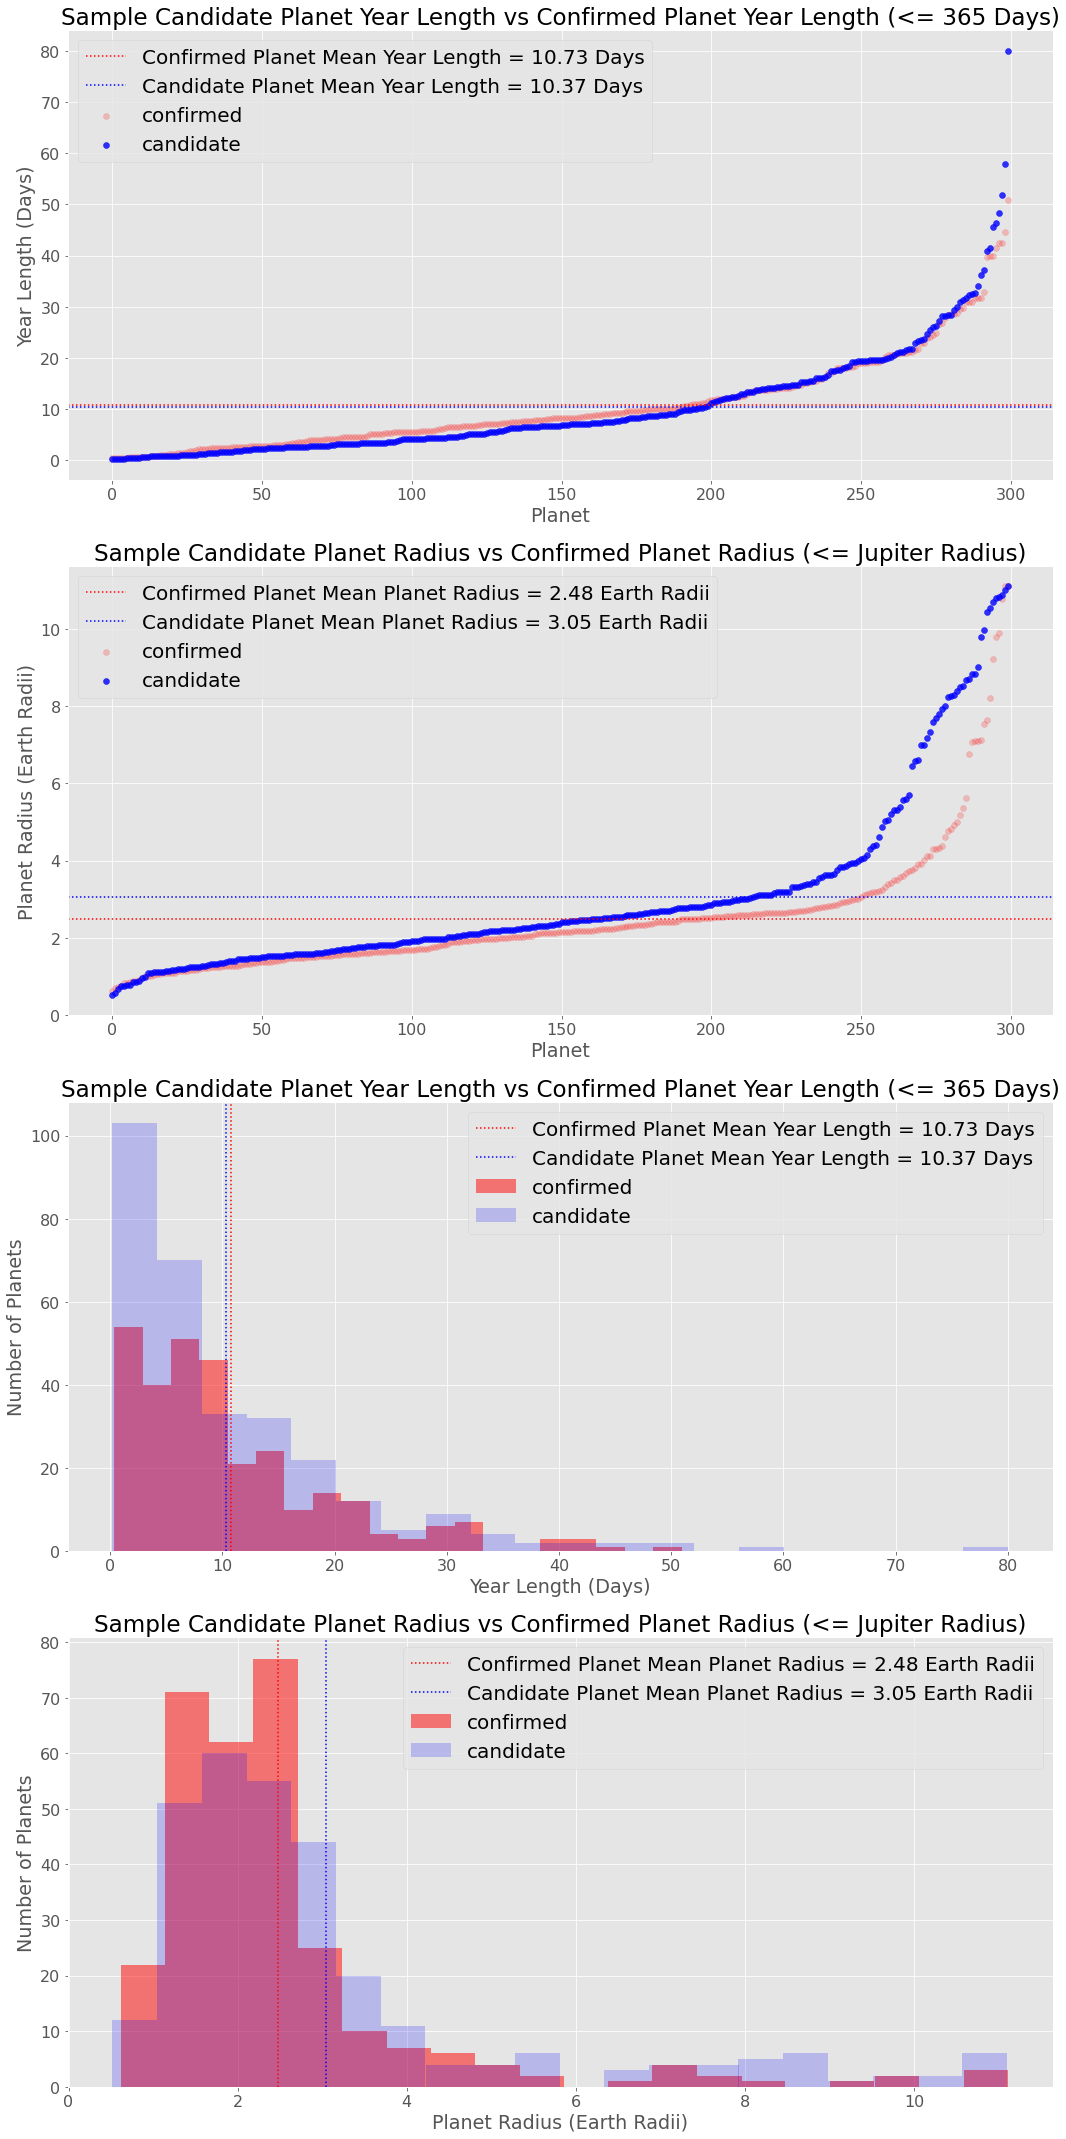

In [40]:
fig, ax = plt.subplots(4, figsize=(15, 30))

ax[0].scatter(x=confirmed_orbper_sample.index, y=confirmed_orbper_sample.loc[:,'pl_orbper'], color='r', marker ='o', alpha=0.2, label='confirmed')
ax[0].scatter(x=candidate_orbper_sample.index, y=candidate_orbper_sample.loc[:,'pl_orbper'], color='b', marker ='o', alpha=0.8, label='candidate')
ax[0].set_title("Sample Candidate Planet Year Length vs Confirmed Planet Year Length (<= 365 Days)")
ax[0].set_ylabel('Year Length (Days)')
ax[0].set_xlabel('Planet')
ax[0].axhline(y=confirmed_orbper_sample_mean, label=f'Confirmed Planet Mean Year Length = {confirmed_orbper_sample_mean} Days', linestyle=':', color='r')
ax[0].axhline(y=candidate_orbper_sample_mean, label=f'Candidate Planet Mean Year Length = {candidate_orbper_sample_mean} Days', linestyle=':', color='b')
ax[0].legend(fontsize=20)
ax[1].scatter(x=confirmed_rad_sample.index, y=confirmed_rad_sample.loc[:,'pl_rade'], color='r', marker ='o', alpha=0.2, label='confirmed')
ax[1].scatter(x=candidate_rad_sample.index, y=candidate_rad_sample.loc[:,'pl_rade'], color='b', marker ='o', alpha=0.8, label='candidate')
ax[1].set_title("Sample Candidate Planet Radius vs Confirmed Planet Radius (<= Jupiter Radius)")
ax[1].set_ylabel('Planet Radius (Earth Radii)')
ax[1].set_xlabel('Planet')
ax[1].axhline(y=confirmed_rad_sample_mean, label=f'Confirmed Planet Mean Planet Radius = {confirmed_rad_sample_mean} Earth Radii', linestyle=':', color='r')
ax[1].axhline(y=candidate_rad_sample_mean, label=f'Candidate Planet Mean Planet Radius = {candidate_rad_sample_mean} Earth Radii', linestyle=':', color='b')
ax[1].legend(fontsize=20)
ax[2].hist(confirmed_orbper_sample.loc[:,'pl_orbper'], bins=20, color='r', alpha = 0.5, label='confirmed')
ax[2].hist(candidate_orbper_sample.loc[:,'pl_orbper'], bins=20, color='b', alpha=0.2, label='candidate')
ax[2].set_title('Sample Candidate Planet Year Length vs Confirmed Planet Year Length (<= 365 Days)')
ax[2].set_ylabel('Number of Planets')
ax[2].set_xlabel('Year Length (Days)')
ax[2].axvline(x=confirmed_orbper_sample_mean, label=f'Confirmed Planet Mean Year Length = {confirmed_orbper_sample_mean} Days', linestyle=':', color='r')
ax[2].axvline(x=candidate_orbper_sample_mean, label=f'Candidate Planet Mean Year Length = {candidate_orbper_sample_mean} Days', linestyle=':', color='b')
ax[2].legend(fontsize=20)
ax[3].hist(confirmed_rad_sample.loc[:,'pl_rade'], bins=20, color='r', alpha = 0.5, label='confirmed')
ax[3].hist(candidate_rad_sample.loc[:,'pl_rade'], bins=20, color='b', alpha=0.2, label='candidate')
ax[3].set_title("Sample Candidate Planet Radius vs Confirmed Planet Radius (<= Jupiter Radius)")
ax[3].set_ylabel('Number of Planets')
ax[3].set_xlabel('Planet Radius (Earth Radii)')
ax[3].axvline(x=confirmed_rad_sample_mean, label=f'Confirmed Planet Mean Planet Radius = {confirmed_rad_sample_mean} Earth Radii', linestyle=':', color='r')
ax[3].axvline(x=candidate_rad_sample_mean, label=f'Candidate Planet Mean Planet Radius = {candidate_rad_sample_mean} Earth Radii', linestyle=':', color='b')
ax[3].legend(fontsize=20)

plt.tight_layout()
plt.show()

In [31]:
confirmed_filtered_yr_rad_sample = confirmed_filtered_yr_rad.sample(n=300)
candidate_filtered_yr_rad_sample = candidate_filtered_yr_rad.sample(n=300)

In [42]:
combined_filtered_sample = pd.concat([confirmed_filtered_yr_rad_sample, candidate_filtered_yr_rad_sample])
corr = stats.pearsonr(x=combined_filtered_sample.loc[:, 'pl_orbper'], y=combined_filtered_sample.loc[:, 'pl_rade'])
print(corr)

(0.14969877034110338, 0.00023326555948747493)


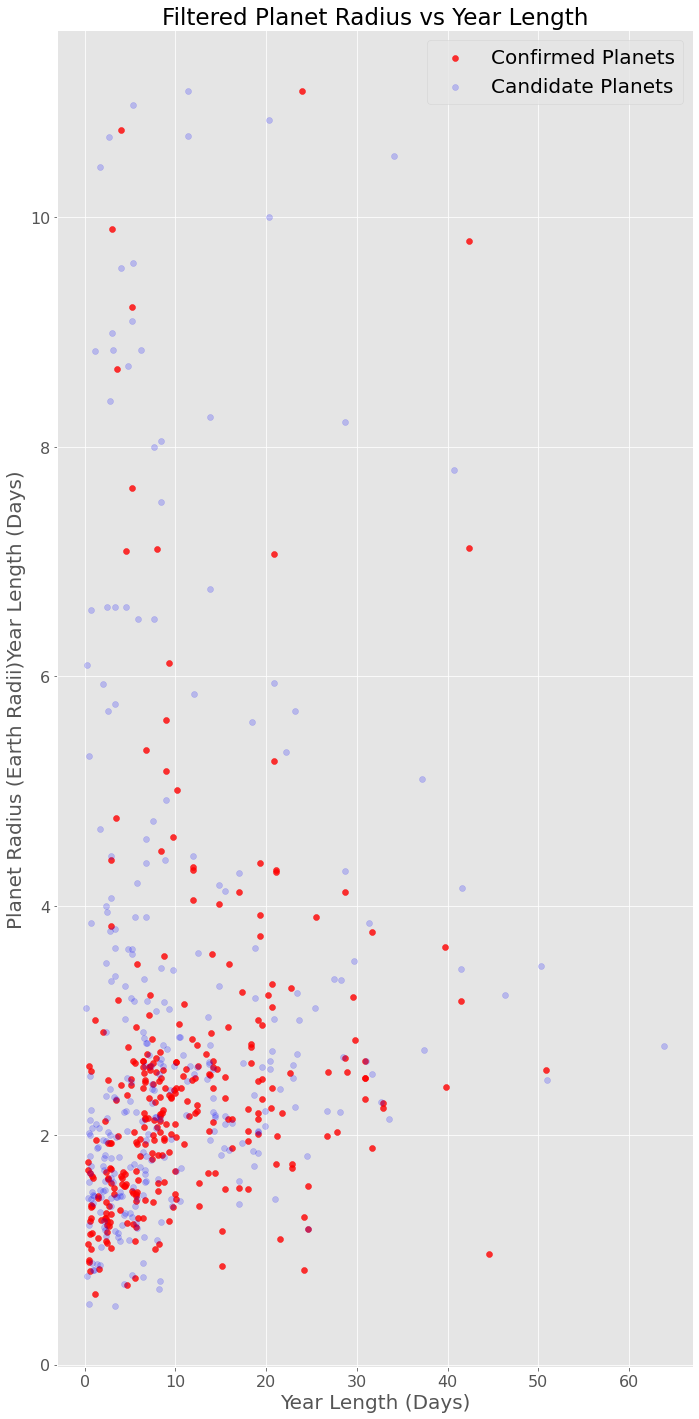

In [33]:
fig, ax = plt.subplots(figsize = (10, 20))

ax.scatter(x=confirmed_filtered_yr_rad_sample.loc[:, 'pl_orbper'], y=confirmed_filtered_yr_rad_sample.loc[:, 'pl_rade'], color='r', marker='o', alpha=0.8, label='Confirmed Planets')
ax.scatter(x=candidate_filtered_yr_rad_sample.loc[:, 'pl_orbper'], y=candidate_filtered_yr_rad_sample.loc[:, 'pl_rade'], color='b', marker='o', alpha=0.2, label='Candidate Planets')
ax.set_title('Filtered Planet Radius vs Year Length')
ax.set_xlabel('Year Length (Days)', fontsize=20)
ax.set_ylabel('Planet Radius (Earth Radii)Year Length (Days)', fontsize=20)
ax.legend(fontsize=20)

plt.tight_layout()
plt.show()